In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

In [2]:
path_output = '/nfs/home/vyasa/projects/proj_off/data_off/clarify/spanish_comorbidity/new/output/'
df = pd.read_csv(path_output+'id_text_cuiLst.csv', encoding='utf-8')
df_id_text = pd.read_csv(path_output+'id_text_kg.csv', encoding='utf-8')
df_id_cui = pd.read_csv(path_output+'id_cuis_kg.csv', encoding='utf-8')
df_id_cui_cn = pd.read_csv(path_output+'id_cuis_cn.csv', encoding='utf-8')

In [3]:
df.head(5)

,Value_ID,value,replacement,google_abbr,deepl_abbr,mev_cui,google_abbr_cui,deepl_abbr_cui,mev_cui_len,google_deepl_abbr_cui,TEXT_ID,TEXT,FINAL_CUI,FINAL_CUI_len
0,A10000,Gastritis crÛnica,Chronic Gastritis,Chronic Gastritis,Chronic Gastritis,"['C0341194', 'C0267146', 'C0085695']","['C0341194', 'C0267146', 'C0085695']","['C0341194', 'C0267146', 'C0085695']",3,"['C0341194', 'C0267146', 'C0085695']",A10000,Gastritis crÛnica,"['C0341194', 'C0267146', 'C0085695']",3
1,A10001,Sarcoma PleomÛrfico Pectoral Mayor,Pectoralis Major Pleomorphic Sarcoma,Pectoralis Major Pleomorphic Sarcoma,Pectoralis Major PleomÛrfic Sarcoma,"['C0598607', 'C0030747', 'C0205825', 'C3674152', 'C3675353', 'C1261358']","['C0598607', 'C0030747', 'C0205825', 'C3674152', 'C3675353', 'C1261358']","['C3674152', 'C3675353', 'C0030747']",6,"['C0598607', 'C0030747', 'C0205825', 'C3674152', 'C3675353', 'C1261358']",A10001,Sarcoma PleomÛrfico Pectoral Mayor,"['C0598607', 'C0030747', 'C0205825', 'C3674152', 'C3675353', 'C1261358']",6
2,A10002,hiperuricemia,Hyperuricemia,Hyperuricemia,Hyperuricemia,"['C4553069', 'C0740394', 'C1856288']","['C4553069', 'C0740394', 'C1856288']","['C4553069', 'C0740394', 'C1856288']",3,"['C4553069', 'C0740394', 'C1856288']",A10002,hiperuricemia,"['C4553069', 'C0740394', 'C1856288']",3
3,A10003,intervenido pÛlipo colon,Colon Polyp Operated,Colon Plipo Intervened,Intervened PÛlipo Colon,"['C0027430', 'C2684091', 'C0267573', 'C0009368', 'C3888384', 'C0032584', 'C3242339']","['C0009368', 'C3888384', 'C2684091']","['C1333906', 'C1705263', 'C0122111']",7,"['C1333906', 'C2684091', 'C0009368', 'C3888384', 'C0122111', 'C1705263']",A10003,intervenido pÛlipo colon,"['C0027430', 'C2684091', 'C0267573', 'C0009368', 'C3888384', 'C0032584', 'C3242339']",7
4,A10004,intervenido estenosis aorta,Aortic Stenosis Operated,Operated Aortic Stenosis,Intervened Aortic Stenosis,"['C3242339', 'C0685726', 'C0003507', 'C0340335']","['C0349516', 'C0685726', 'C0003507']",['C0003507'],4,"['C0349516', 'C0685726', 'C0003507']",A10004,intervenido estenosis aorta,"['C3242339', 'C0685726', 'C0003507', 'C0340335']",4


In [4]:
df_id_text.shape, df_id_cui.shape,

((5444, 2), (25353, 2))

<AxesSubplot:xlabel='FINAL_CUI'>

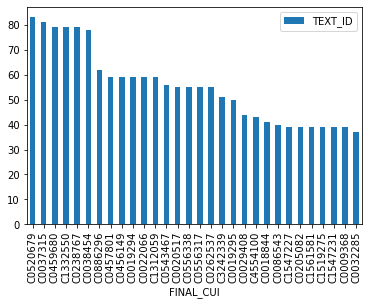

In [5]:
df_count = df_id_cui.groupby(['FINAL_CUI'])[['TEXT_ID']].count()
df_top = df_count.sort_values(['TEXT_ID'],ascending=False).iloc[0:30]
df_top.plot.bar()#x='lab', y='val', rot=0)

In [6]:
df[df['FINAL_CUI_len']==0][['Value_ID', 'value','replacement']].to_csv(path_output+'nothaving_cui.csv', encoding='utf-8',\
    index=False)
df[df['FINAL_CUI_len']==0]

,Value_ID,value,replacement,google_abbr,deepl_abbr,mev_cui,google_abbr_cui,deepl_abbr_cui,mev_cui_len,google_deepl_abbr_cui,TEXT_ID,TEXT,FINAL_CUI,FINAL_CUI_len
817,A10814,"ProtrusiÛn C3-C4,",NaN,"Protrusion C3-C4,","C3-C4 Protrusion,",[],[],[],0,[],A10814,"ProtrusiÛn C3-C4,",[],0
3383,A13379,CIRUGIA APENDICITIS,Surgery Appendicitis,APPENDICITIS SURGERY,APPENDICITIS SURGERY,[],[],[],0,[],A13379,CIRUGIA APENDICITIS,[],0


In [7]:
df_id_cui_cn.head(1)

,TEXT_ID,FINAL_CUI,Canonical_Name
0,A10000,C0341194,Chronic cystic gastritis


In [8]:
df_count_cn = df_id_cui_cn.groupby(['FINAL_CUI'])[['TEXT_ID']].count()
df_top_cn = df_count_cn.sort_values(['TEXT_ID'],ascending=False)
cui_cn_dict = dict(zip(df_id_cui_cn.FINAL_CUI, df_id_cui_cn.Canonical_Name))
df_top_cn.head(5)

,TEXT_ID
FINAL_CUI,
C0520679,83
C0037315,81
C0459680,79
C1332550,79
C0238767,79


In [9]:
df_top_cn['CUI'] = df_top_cn.index
df_top_cn['Canonical_Name'] = df_top_cn['CUI'].apply(lambda x : cui_cn_dict[x])
df_top_cn['TEXT_ID_COUNT'] = df_top_cn['TEXT_ID']

In [10]:
df_top_cn_new = df_top_cn[['CUI', 'TEXT_ID_COUNT', 'Canonical_Name']]

In [26]:
import plotly.express as px
fig = px.bar(df_top_cn_new.iloc[0:50], y='TEXT_ID_COUNT', x='CUI', text='TEXT_ID_COUNT', hover_data=['Canonical_Name'], width=1000, height=500)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',xaxis_tickangle=-45)
fig.show()
fig.write_html(path_output+"plot1.html")